In [79]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

import nltk
import ssl
# creates an SSL context without verifying the authenticity of certificates.
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

#nltk.download('stopwords')
warnings.filterwarnings('ignore')

In [80]:
df = pd.read_csv('/Users/sofiautoft/research/Recommender_System_TedTalks/tedx_dataset-master/tedx_dataset.csv')
print(df.head())

                                idx       main_speaker  \
0  8d2005ec35280deb6a438dc87b225f89     Alexandra Auer   
1  b3072cd11f40eb57fd259555264476c6  Elizabeth Gilbert   
2  4adc9fee977fa04c357ed4c9b52aa3cc       Butterscotch   
3  59c641a72b495d522a7932145d6c02b3         Ethan Lisi   
4  d227f2faf6ec185e54436d86463f499b      Daniel Finkel   

                                               title  \
0                    The intangible effects of walls   
1  It's OK to feel overwhelmed. Here's what to do...   
2                                  "Accept Who I Am"   
3               What it's really like to have autism   
4              Can you solve the sea monster riddle?   

                                             details           posted  \
0  More barriers exist now than at the end of Wor...  Posted Apr 2020   
1  If you're feeling anxious or fearful during th...  Posted Apr 2020   
2  Firing off her formidable beatboxing skills, m...  Posted Apr 2020   
3  "Autism is not a di

In [81]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')

    imp_words = []

    # Storing the important words
    for word in str(text).split():
        word = word.lower()
        
        if word not in stop_words:
            imp_words.append(word)

    output = " ".join(imp_words)

    return output

def cleaning_punctuations(text):
	signal = str.maketrans('', '', punctuations_list)
	return text.translate(signal)

def get_similarities(talk_content, data):

	# Getting vector for the input talk_content.
	talk_array1 = vectorizer.transform(talk_content).toarray()

	# We will store similarity for each row of the dataset.
	sim = []
	pea = []
	for idx, row in data.iterrows():
		details = row['details']

		# Getting vector for current talk.
		talk_array2 = vectorizer.transform(
			data[data['details'] == details]['details']).toarray()

		# Calculating cosine similarities
		cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

		# Calculating pearson correlation
		pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

		sim.append(cos_sim)
		pea.append(pea_sim)

	return sim, pea

def recommend_talks(talk_content, data):

	title = [talk_content]
	data['cos_sim'], data['pea_sim'] = get_similarities(title, df)

	data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[
					False, False], inplace=True)

	new_df = data[['main_speaker', 'title']]
	print("Ted Talks recommended for you since you liked: " + talk_content)
	for i in range(5):
		print("     Consider the Ted Talk: " + new_df.iloc[i,1] + " by " + new_df.iloc[i, 0])

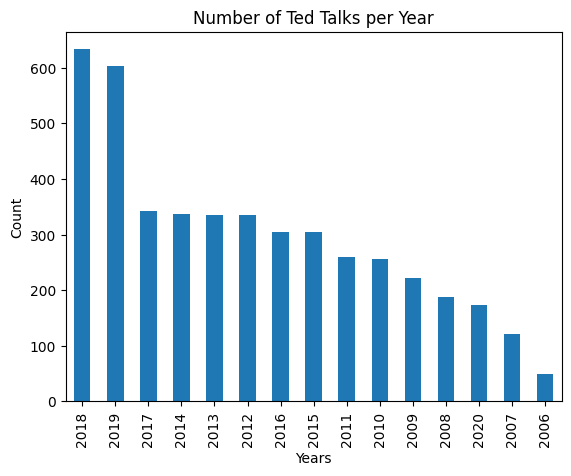

,main_speaker,details,title
0,Alexandra Auer,The intangible effects of walls More barriers ...,The intangible effects of walls
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" Firing off her formidable be...","""Accept Who I Am"""
3,Ethan Lisi,"What it's really like to have autism ""Autism i...",What it's really like to have autism
4,Daniel Finkel,Can you solve the sea monster riddle? Accordin...,Can you solve the sea monster riddle?


In [82]:
splitted = df['posted'].str.split(' ', expand=True)

# Creating columns for month and year of the talk
df['year'] = splitted[2].astype('int')
df['month'] = splitted[1]

df['year'].value_counts().plot.bar()
plt.title("Number of Ted Talks per Year")
plt.xlabel("Years")
plt.ylabel("Count")
plt.show()

# Let's combine the title and the details of the talk.
df['details'] = df['title'] + ' ' + df['details']

# Removing the unnecessary information
df = df[['main_speaker', 'details', 'title']]
df.dropna(inplace = True)
df.head()

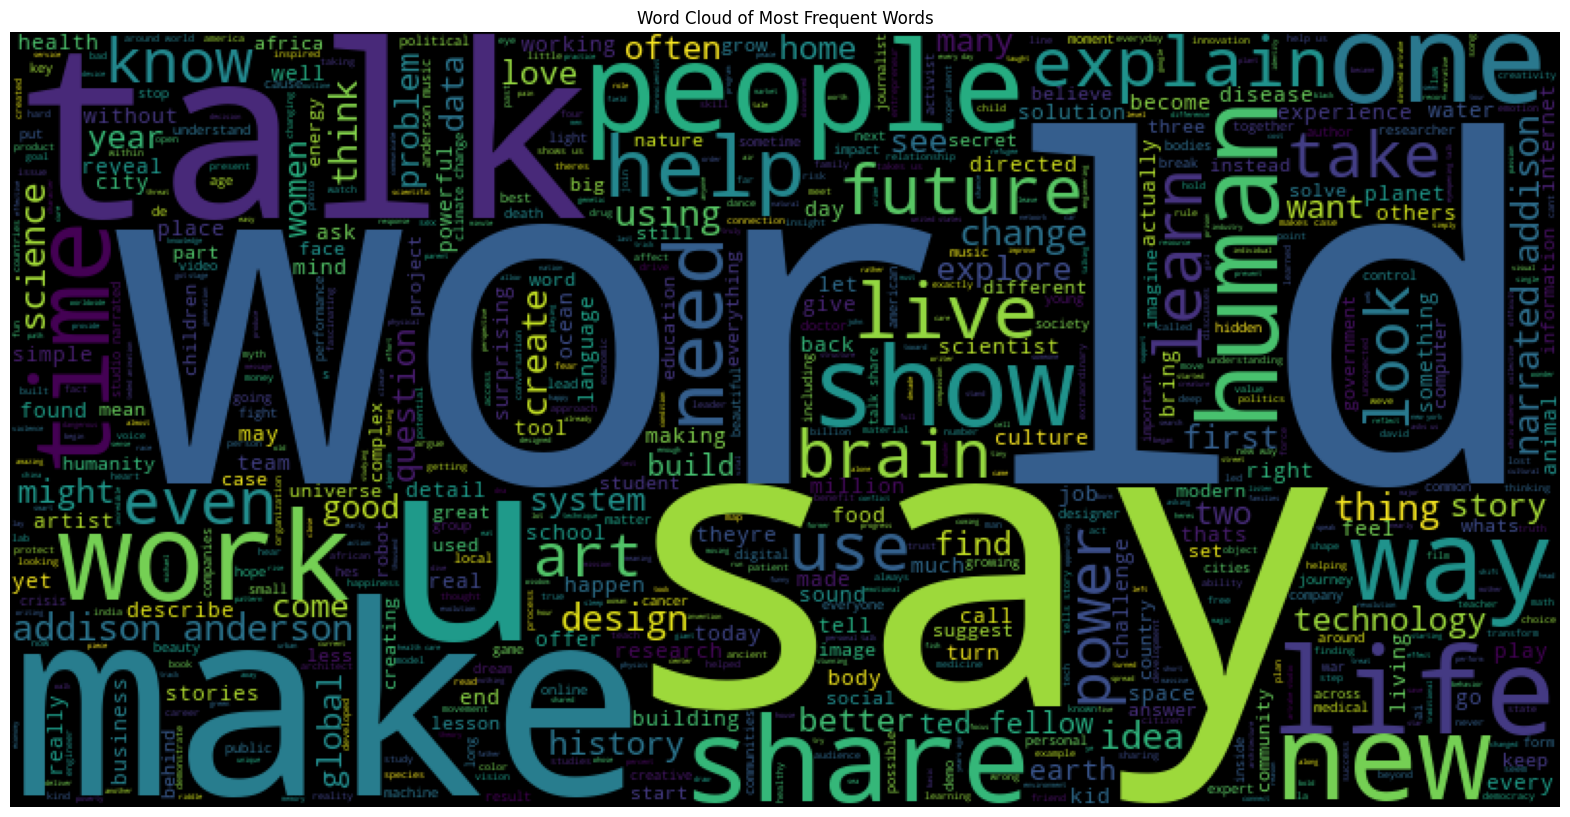

TfidfVectorizer()

In [83]:
data = df.copy()

df['details'] = df['details'].apply(lambda text: remove_stopwords(text))
df.head()

punctuations_list = string.punctuation

df['details'] = df['details'].apply(lambda x: cleaning_punctuations(x))
df.head()

details_corpus = " ".join(df['details'])

plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, 
			width=800,
			height=400).generate(details_corpus)
plt.axis('off')
plt.title("Word Cloud of Most Frequent Words")
plt.imshow(wc)
plt.show()

#capture similarities
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df['details'])

In [84]:
#examples
talk_content = 'Time Management and working hard to become successful in life'
recommend_talks(talk_content, data)

talk_content = "Why I photograph the quiet moments of grief and loss"
recommend_talks(talk_content, data)

Ted Talks recommended for you since you liked: Time Management and workinghard to become successful in life
     Consider the Ted Talk: How to gain control of your free time by Laura Vanderkam
     Consider the Ted Talk: Finding your personal mission in life by Philip Krinks
     Consider the Ted Talk: Management lessons from Chinese business and philosophy by Fang Ruan
     Consider the Ted Talk: We should all be feminists by Chimamanda Ngozi Adichie
     Consider the Ted Talk: India's invisible innovation by Nirmalya Kumar
Ted Talks recommended for you since you liked: Why I photograph the quiet moments of grief and loss
     Consider the Ted Talk: What reading slowly taught me about writing by Jacqueline Woodson
     Consider the Ted Talk: Why we should build wooden skyscrapers by Michael Green
     Consider the Ted Talk: Meet Spot, the robot dog that can run, hop and open doors by Marc Raibert
     Consider the Ted Talk: Crowdsource your health by Lucien Engelen
     Consider the T